In [80]:
from stompy.io.local import noaa_coops
import os
import six
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
cache_dir='cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

In [81]:
# there is some bad data (datum offset) around 2015-02-28 to 2015-05-02
# 
pc=noaa_coops.coops_dataset(station=9415144,
                            products=['water_level'],days_per_request='M',
                            start_date=np.datetime64("2015-06-01"),
                            end_date=np.datetime64("2020-06-01"),
                            cache_dir=cache_dir)

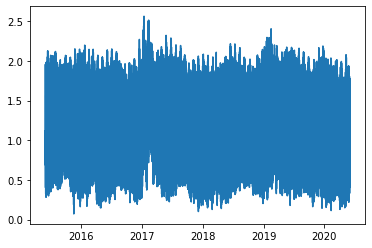

In [82]:
plt.figure()
plt.plot( pc.time, pc.water_level.values[0,:])

In [83]:
df=pc.isel(station=0).to_dataframe().reset_index()
df.head()

,time,lon,lat,name,station,water_level
0,2015-06-01 00:00:00,-122.0395,38.056,Port Chicago,9415144,1.117
1,2015-06-01 00:06:00,-122.0395,38.056,Port Chicago,9415144,1.092
2,2015-06-01 00:12:00,-122.0395,38.056,Port Chicago,9415144,1.068
3,2015-06-01 00:18:00,-122.0395,38.056,Port Chicago,9415144,1.043
4,2015-06-01 00:24:00,-122.0395,38.056,Port Chicago,9415144,1.023


In [84]:
t0=df.time.values[0]
lunar_days=(df.time.values-t0)/np.timedelta64(int(24.84*3600),'s')
daily=df.groupby( np.floor(lunar_days)).water_level # Tidal or Lunar day
# daily=df.groupby( df.time.dt.date).water_level
daily_ll=daily.min()
daily_hh=daily.max()

In [85]:
# compare these MLLW, MHWW
print("Mean of daily low: %.3fm"%daily_ll.mean())
# Compare to offical datum of 0.335m
print("Mean of daily high: %.3fm"%daily_hh.mean())
# Compare to official datum of 1.833m

Mean of daily low: 0.445m
Mean of daily high: 1.883m


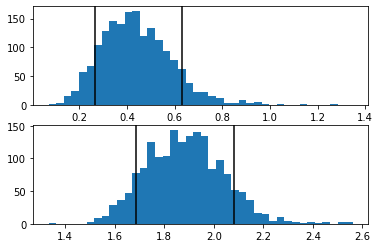

In [86]:
fig,axs=plt.subplots(2,1)
for ax, data in zip( axs, [daily_ll,daily_hh] ):
    ax.hist( data,bins=40 )

    extrema = np.percentile(data.values, [10,90])
    ax.axvline( extrema[0],color='k')
    ax.axvline( extrema[1],color='k')
    


In [87]:
# Lunar month
t0=df.time.values[0]
# 29.530 is the length of the synodic lunar month, i.e. the time
# between new moons, and the relevant time for tidal cycles.
lunar_months=(df.time.values-t0)/np.timedelta64(int(29.530*86400),'s')
monthly=df.groupby( np.floor(lunar_months)).water_level # Tidal or Lunar day
monthly_ll=monthly.min()
monthly_hh=monthly.max()

print("Mean of monthly low:  %.3fm"%monthly_ll.mean())
print("Mean of monthly high: %.3fm"%monthly_hh.mean())

Mean of monthly low:  0.257m
Mean of monthly high: 2.129m
